In [2]:
from pprint import pprint
import matplotlib.pyplot as plt
import csv

In [3]:
# Imports for calculations
import pandas as pd
import numpy as np

In [4]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
merged_data_df = pd.read_csv("Output/merged_data.csv")

# Display sample data
merged_data_df.head()

,Unnamed: 0,ori,agency_name,agency_id,state_name,state_abbr,division_name,region_name,region_desc,county_name,agency_type_name,nibrs,nibrs_start_date,latitude,longitude,data_year,offense,cleared,actual
0,0,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2013,violent-crime,84,109
1,1,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2014,violent-crime,81,123
2,2,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2015,violent-crime,97,114
3,3,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2016,violent-crime,77,95
4,4,NC0010000,Alamance County Sheriff's Office,10873,North Carolina,NC,South Atlantic,South,Region III,ALAMANCE,County,True,2019-01-01T00:00:00.000Z,36.041974,-79.399935,2017,violent-crime,34,46


In [5]:
#agency_type_commited = merged_data_df['agency_type_name'].unique()
#columns = 
agency_group = merged_data_df.groupby('agency_type_name')[['cleared', 'actual']].sum().reset_index()
agency_group

,agency_type_name,cleared,actual
0,City,119765,277042
1,County,43353,77390
2,Other,102,163
3,Other State Agency,24,68
4,Tribal,378,1013
5,University or College,571,1019


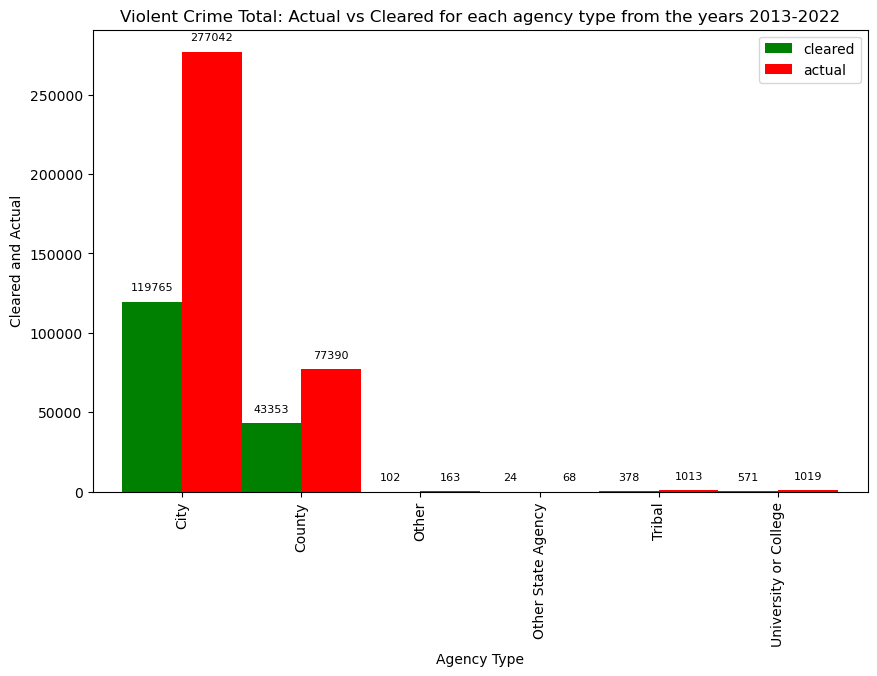

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 1

agency_group.plot(kind='bar', x='agency_type_name', y=['cleared', 'actual'], color=['green', 'red'], ax=ax, width=bar_width)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.xlabel('Agency Type')
plt.ylabel('Cleared and Actual')
plt.title('Violent Crime Total: Actual vs Cleared for each agency type from the years 2013-2022')
plt.savefig("Output/ashleigh-bar.png")
plt.show()

In [7]:
agency_group_year = merged_data_df.groupby(['agency_type_name', 'data_year'])[['cleared', 'actual']].sum().reset_index()
agency_group_year

,agency_type_name,data_year,cleared,actual
0,City,2013,13187,23855
1,City,2014,12449,22950
2,City,2015,12054,23711
3,City,2016,12928,25634
4,City,2017,12956,26159
5,City,2018,11336,25330
6,City,2019,10294,29423
7,City,2020,11959,34644
8,City,2021,11886,33253
9,City,2022,10716,32083


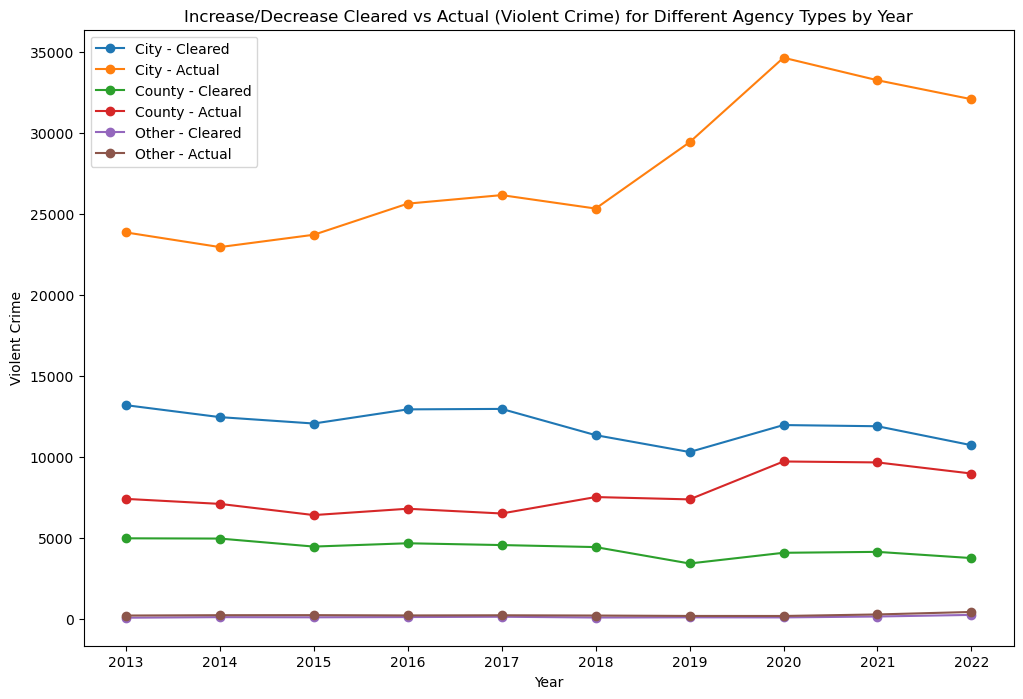

In [10]:
aggregated_data = agency_group_year.copy()
aggregated_data['agency_type_grouped'] = aggregated_data['agency_type_name'].replace(
    {'Other State Agency': 'Other', 'Tribal': 'Other', 'University or College': 'Other'}
)
aggregated_data = aggregated_data.groupby(['agency_type_grouped', 'data_year'])[['cleared', 'actual']].sum().reset_index()

plt.figure(figsize=(12, 8))

# Plot cleared and actual crimes for 'City' and 'County'
for agency_type in aggregated_data['agency_type_grouped'].unique():
    subset = aggregated_data[aggregated_data['agency_type_grouped'] == agency_type]
    plt.plot(subset['data_year'], subset['cleared'], marker='o', label=f'{agency_type} - Cleared')
    plt.plot(subset['data_year'], subset['actual'], marker='o', label=f'{agency_type} - Actual')

plt.xticks(agency_group_year['data_year'].unique())
plt.xlabel('Year')
plt.ylabel('Violent Crime')
plt.title('Increase/Decrease Cleared vs Actual (Violent Crime) for Different Agency Types by Year')
plt.savefig("Output/ashleigh-line.png")
plt.legend()
plt.show()